<h1> Analysis of Networks with NetworkX </h1>

Import the library

In [1]:
import networkx as nx

 Create the graph.Then create the graph shown above using networkX by adding nodes and edges.

In [2]:
G=nx.Graph()
G.add_nodes_from(['A','B','C','D','E','F','G'])
G.add_edges_from([('A','B'),('A','C'),('B','C'),('C','E'),('D','F'),('C','D'),('F','G'),('F','H')])

Finding the node with highest degree centrality.Finding the node with highest betweenness centrality.add some weights to the edges and find the betweenness centrality once more but this time give the edge weights as parameters. Notice how things change.
Draw the graph. Firstly, lay out the graph and store the node positions in positions.

In [3]:
#betweeness centrality
betweenValues = nx.betweenness_centrality(G)
print("Without weights : ", betweenValues)

#new graph with weights
G1=nx.Graph()
G1.add_nodes_from(['A','B','C','D','E','F','G'])
G1.add_weighted_edges_from([('A','B',3.0),('A','C',2.0),('B','C',1.0),('C','E',10.0),('D','F',100.0),('C','D',10.0),('F','G',10.0),('F','H',10.0)])
betweenValues = nx.betweenness_centrality(G1,weight='weight')
print("With weights : ", betweenValues)

Without weights :  {'A': 0.0, 'B': 0.0, 'C': 0.6666666666666666, 'D': 0.5714285714285714, 'E': 0.0, 'F': 0.5238095238095237, 'G': 0.0, 'H': 0.0}
With weights :  {'A': 0.0, 'B': 0.0, 'C': 0.6904761904761905, 'D': 0.5714285714285714, 'E': 0.0, 'F': 0.5238095238095237, 'G': 0.0, 'H': 0.0}


Draw the graph. Firstly, lay out the graph and store the node positions in positions

{'A': array([ 0.61627661, -0.68881677]), 'B': array([ 0.70799168, -0.420444  ]), 'C': array([ 0.27687726, -0.40921848]), 'D': array([-0.06965549,  0.08341803]), 'E': array([ 0.06278303, -0.80617459]), 'F': array([-0.39932883,  0.55533221]), 'G': array([-0.82268215,  0.68590361]), 'H': array([-0.3722621,  1.       ])}


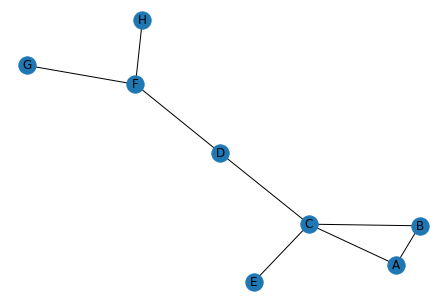

In [4]:
import matplotlib.pyplot as plt
positions=nx.spring_layout(G)

print(positions)

#Then draw the nodes and labels (separately) as those positions:
nx.draw(G,pos=positions)
nx.draw_networkx_labels(G,pos=positions)
plt.draw() 

Now we will load a graph of coauthorship data load the data from this GraphML file. This describes a coauthorship network of network scientist (appropriately enough!). This was compiled by Newman in May 2006 - see this figure.

In [5]:
coauthorshipG=nx.read_graphml("netScience.graphml")

Finding the connected components and finding how many they are. Converting to a list may help count them.
Finding the largest connected component subgraph using connected_component_subgraphs(). This page tells you how to get the largest. Counting the number of authors and relations and drawing this subgraph.

In [6]:
connectedSubgraphs = (coauthorshipG.subgraph(c) for c in nx.connected_components(coauthorshipG))
connectedSubgraphs = list(connectedSubgraphs)
countComps = len(connectedSubgraphs)
print("Graph has" , countComps , " connected components")

Graph has 396  connected components


No. of authors 379
No. of relations 914


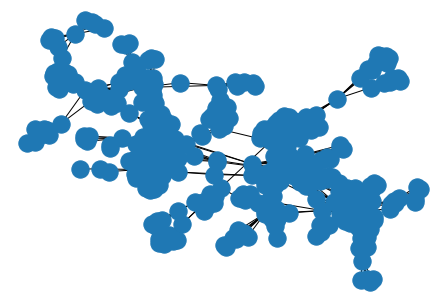

In [7]:
#the largest subgraph
largestSubgraph = max(connectedSubgraphs,key=len)

print("No. of authors",nx.number_of_nodes(largestSubgraph))
print("No. of relations",nx.number_of_edges(largestSubgraph))

nx.draw(largestSubgraph)
plt.draw()


Finding the most central author, i.e. with the highest betweenness centrality, using NetworkX's betweenness_centrality() function. This returns a dictionary from which you can extract the keys and values with keys() and values(). The Numpy's argmax() function will help find the index with the highest value, which we can use to retrieve the key (i.e. the node).

In [8]:
import numpy as np
betweenValues = nx.betweenness_centrality(largestSubgraph)

values = list(betweenValues.values())
keys = list(betweenValues.keys())

highestIndex = np.argmax(values)
print("The node is", keys[highestIndex] , "has the centrality degree of",values[highestIndex])

print(largestSubgraph.nodes[str(keys[highestIndex])]['label'])

The node is 78.0 has the centrality degree of 0.3971841813568117
NEWMAN, M


Finding the average clustering coefficient of all the connected component subgraphs using NetworkX's clustering() method. We'll may need to iterate through each subgraph.

In [9]:
avg = []
for i in range(0,countComps):
    clustCoeff = nx.clustering(connectedSubgraphs[i])
    coeffVals = list(clustCoeff.values())
    avg.append(np.average(coeffVals))
    
print("average clustering coefficient is : ",np.average(avg))    

average clustering coefficient is :  0.3550125098071741


Finding some tightly connected subgraphs (with high clustering - ignore those with a clustering of 1 as these tend to be very small). Draw them.
Try drawing the whole graph (for fun).

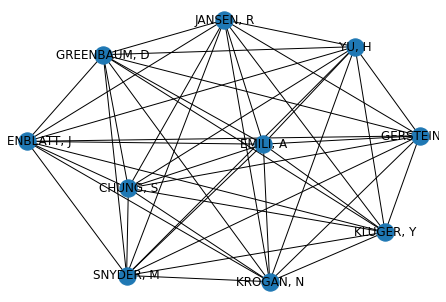

In [10]:
index = 203

position = nx.spring_layout(connectedSubgraphs[index])
nodeLabels = nx.get_node_attributes(connectedSubgraphs[index],'label')
nx.draw(connectedSubgraphs[index],labels = nodeLabels,pos = position)
plt.draw()

<h1>  Analysis of Les Misérables with NetworkX </h1>

<b>Download and tokenise a book</b>

In [1]:
from urllib.request import urlopen
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
from urllib.request import urlopen
target_url0 = 'http://www.gutenberg.org/files/135/135-0.txt'
book_raw = urlopen(target_url0).read().decode('utf-8')

In [3]:
type(book_raw)

str

In [4]:
len(book_raw)

3325128

In [5]:
book_raw[1:100]

'\r\nThe Project Gutenberg EBook of Les Misérables, by Victor Hugo\r\n\r\nThis eBook is for the use of any'

Pre-processing of the text . First, to converty it into tokens

In [6]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
word_tokens  = word_tokenize(book_raw)
print(len(book_raw),len(word_tokens))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


3325128 682012


In [7]:
book_raw[1:100]

'\r\nThe Project Gutenberg EBook of Les Misérables, by Victor Hugo\r\n\r\nThis eBook is for the use of any'

In [8]:
print(word_tokens[1:100])

['The', 'Project', 'Gutenberg', 'EBook', 'of', 'Les', 'Misérables', ',', 'by', 'Victor', 'Hugo', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', '.', 'You', 'may', 'copy', 'it', ',', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'www.gutenberg.org', 'Title', ':', 'Les', 'Misérables', 'Complete', 'in', 'Five', 'Volumes', 'Author', ':', 'Victor', 'Hugo', 'Translator', ':', 'Isabel', 'F.', 'Hapgood', 'Release', 'Date', ':', 'June', '22', ',', '2008', '[', 'EBook', '#', '135', ']', 'Last', 'Updated', ':', 'May', '19', ',', '2019', 'Language', ':', 'English', 'Character', 'set', 'encoding']


In [9]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words   = (stopwords.words('english'))
len(stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179

In [10]:
print(stop_words[1:100])

['me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once']


There are some extra words that we can remove which are not present in the list.

In [11]:
extra_words = ['A', 'All', 'and', 'And', 'But', 'come', 'could', 'day', "even", "He", "he", "it", 
               'It', 'If', 'I', 'In', 'like', 'man', 'made', 'men', 'must', "Man", 'One', 
               'one', 'She', 'see', "she", 'said', 'say', 'Say', 'sort', 'still', 'the', 'That',
               'To', 'They', 'This', 'The', 'Then', 'There', "would", 'two', 'What', 'You', '-', '_', '*','—'
               'Gutenberg']
extra_words[1:5]

['All', 'and', 'And', 'But']

Removing the stop words and the extra words

In [12]:
filetered_book = [w for w in word_tokens if not w in stop_words]
filetered_book_2 = [w for w in filetered_book if not w in extra_words]
print(filetered_book_2[1:10])

['Project', 'Gutenberg', 'EBook', 'Les', 'Misérables', ',', 'Victor', 'Hugo', 'eBook']


To remove the punctuations which are included in the tokens

In [13]:
# punctions = """"""  !()-,.{}':—?;'""'[]#$%&*<>/~=@"\^` """"""
punctuations = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''
filtered_book3 = [w for w in filetered_book_2 if w not in punctuations]
print("book without stop words : ",len(filetered_book),"book without extra words : ",len(filetered_book_2),"book without punctuations : ",len(filtered_book3))

book without stop words :  416130 book without extra words :  377950 book without punctuations :  287527


Now we will analyze relation between the characters based on occurance of the names within the text. First we will remove index from the text

In [14]:
text_start = filtered_book3.index('HAUTEVILLE')
filtered_book4 = filtered_book3[text_start:]
len(filtered_book4)

284658

In [15]:
filtered_book4[10:20]

['MYRIEL',
 '1815',
 'M.',
 'Charles-François-Bienvenu',
 'Myriel',
 'Bishop',
 'D——',
 'old',
 'seventy-five',
 'years']

Now we need to define the characters

In [16]:
character_list = ['Myriel','Bishop','Baptistine','Magloire','Valjean','Gervais','Fantine','Blachevelle',
                 'Dahlia','Fameuil','Favourite','Listolier','Zéphine','Cosette','Éponine','Azelma','Javert'
                 'Fauchelevent','Bamatabois','Champmathieu','Brevet','Simplice','Chenildieu','Cochepaille',
                 'Innocente','Gavroche','Magnon','Gillenormand','Marius','Colonel','Mabeuf','Enjolras','Combeferre ',
                 'Prouvaire','Feuilly','Courfeyrac','Bahorel','Lesgle','Joly','Grantaire','Patron-Minette','Bougon',
                 'Brujon','Toussaint','Cravatte','Reverend','Ascens','Félix','Monsieur Thénardier','Madame Thénardier']
numCharacter = len(character_list)
numCharacter

49

In [17]:
character_map = {}
for i in range(numCharacter):
    character_map[i] = character_list[i]
character_map    

{0: 'Myriel',
 1: 'Bishop',
 2: 'Baptistine',
 3: 'Magloire',
 4: 'Valjean',
 5: 'Gervais',
 6: 'Fantine',
 7: 'Blachevelle',
 8: 'Dahlia',
 9: 'Fameuil',
 10: 'Favourite',
 11: 'Listolier',
 12: 'Zéphine',
 13: 'Cosette',
 14: 'Éponine',
 15: 'Azelma',
 16: 'JavertFauchelevent',
 17: 'Bamatabois',
 18: 'Champmathieu',
 19: 'Brevet',
 20: 'Simplice',
 21: 'Chenildieu',
 22: 'Cochepaille',
 23: 'Innocente',
 24: 'Gavroche',
 25: 'Magnon',
 26: 'Gillenormand',
 27: 'Marius',
 28: 'Colonel',
 29: 'Mabeuf',
 30: 'Enjolras',
 31: 'Combeferre ',
 32: 'Prouvaire',
 33: 'Feuilly',
 34: 'Courfeyrac',
 35: 'Bahorel',
 36: 'Lesgle',
 37: 'Joly',
 38: 'Grantaire',
 39: 'Patron-Minette',
 40: 'Bougon',
 41: 'Brujon',
 42: 'Toussaint',
 43: 'Cravatte',
 44: 'Reverend',
 45: 'Ascens',
 46: 'Félix',
 47: 'Monsieur Thénardier',
 48: 'Madame Thénardier'}

<h1><b> Analysis of Les Misérables with NetworkX  </b></h1>

Now, to count specific words, we have to define those words. Let's try to count the occurrences of the main characters of the book.  Thus,  we need to define the characters

In [18]:
character_list = ['Myriel','Bishop','Baptistine','Magloire','Cravatte','Valjean','Gervais','Fantine','Tholomyès'
                  ,'Blachevelle','Dahlia','Fameuil','Favourite','Listolier','Zéphine','Cosette','Thénardier',
                  'Éponine','Azelma','Javert','Fauchelevent','Bamatabois','Champmathieu',
                  'Brevet','Simplice','Chenildieu','Cochepaille','Innocente','Reverend','Ascension','Crucifixion',
                  'Gavroche','Magnon',
                  'Gillenormand','Marius','Colonel','Mabeuf','Enjolras','Combeferre','Prouvaire',
                 'Feuilly','Courfeyrac','Bahorel','Lesgle','Joly','Grantaire','Patron-Minette','Brujon',
                 'Toussaint'] 
numCharacters = len(character_list)

There is a huge number of caveats of this part of the analysis. For instance:

the name Thénardier is taken as a single instance, whilst it can cover either Madame or Monsieur Thénardier.
The Bishop Myriel is sometimes referred as Myriel and sometimes as Bishop
Petit Gervais and St Gervais will be confused as well.

A more sophisticated analysis would distinguish some of these by taking bi-grams (pairs of words) and distinguishing between these. More subtle caveats:

The Bishop or any other character may be referred in a thought and it does not mean it was present in a scene.

 
Those distinctions are outside the scope of the present notebook, which aims to illustrate the process of extraction of interactions between characters from a book. Notice that more sophisticated character maps, such as the very popular one created by Donald Knuth is also subject to criticism

With the list of characters, find how many times each of them appears in the text.


In [19]:
#character occurances in a dictionary format to see how many times a character appears in a text 
numOccurancesDict = dict((char,word_tokens.count(char)) for char in character_list)   
numOccurancesDict   

{'Myriel': 28,
 'Bishop': 260,
 'Baptistine': 27,
 'Magloire': 76,
 'Cravatte': 3,
 'Valjean': 1096,
 'Gervais': 25,
 'Fantine': 200,
 'Tholomyès': 60,
 'Blachevelle': 27,
 'Dahlia': 19,
 'Fameuil': 11,
 'Favourite': 42,
 'Listolier': 11,
 'Zéphine': 16,
 'Cosette': 987,
 'Thénardier': 520,
 'Éponine': 80,
 'Azelma': 21,
 'Javert': 443,
 'Fauchelevent': 284,
 'Bamatabois': 4,
 'Champmathieu': 46,
 'Brevet': 23,
 'Simplice': 28,
 'Chenildieu': 14,
 'Cochepaille': 14,
 'Innocente': 2,
 'Reverend': 10,
 'Ascension': 3,
 'Crucifixion': 13,
 'Gavroche': 300,
 'Magnon': 28,
 'Gillenormand': 230,
 'Marius': 1327,
 'Colonel': 20,
 'Mabeuf': 87,
 'Enjolras': 247,
 'Combeferre': 88,
 'Prouvaire': 28,
 'Feuilly': 26,
 'Courfeyrac': 182,
 'Bahorel': 36,
 'Lesgle': 3,
 'Joly': 36,
 'Grantaire': 83,
 'Patron-Minette': 5,
 'Brujon': 57,
 'Toussaint': 52}

In [20]:
import pandas as pd
k=0;
numOccurrences=pd.Series(range(numCharacters))
for character in character_list:
    numOccurrences[k] =filtered_book4.count(character)
    k=k+1

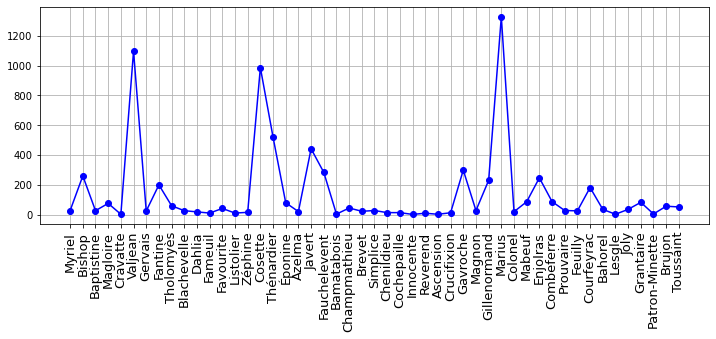

In [21]:
#plotting the occurances of each character
fig = plt.figure(figsize = (12,4))
ax = fig.add_subplot(111)
plt.plot(numOccurrences,'b-o')
plt.xticks(np.arange(0,numCharacter),character_list)
plt.grid()
ax.tick_params(axis = 'x' , rotation=90,labelsize = 13)

Further, can we can fin *where* in the text each character appears.

In [22]:
#list to get positions of characters 
positions_characters = [] 
for i in range(len(numOccurrences)):
    a = np.zeros(numOccurrences[i])  
    positions_characters.append(a)   

Since we have now located the position where a certain character appears, we can decide that two characters that appear within a certain distance of each other (say 500 tokens appart) are "interacting". As with other steps, there are a large number of caveats:
Visualizing certain number of interaction for Myriel and Cravatte, Myriel and Valjean, Valjean and Gervais, etc

In [23]:
interactions_characters = np.zeros((numCharacters,numCharacters))
for i in range(numCharacters-1):
    for j in range(i+1,numCharacters):
        # A pair of characters (i,j) has been selected, 
        # now iterate over their locations and find the distances
        #print(i,j)
        for loc_i in range(numOccurrences[i]):
            for loc_j in range(numOccurrences[j]):
                # find distance
                dist = abs(positions_characters[i][loc_i]-positions_characters[j][loc_j])
                #if distance is small, then record interaction
                if (dist<500):
                    interactions_characters[i,j]=interactions_characters[i,j]+1
                    interactions_characters[j,i]=interactions_characters[j,i]+1
                #print(i,j, positions_characters[i][loc_i],positions_characters[j][loc_j])
                #print(i,j, loc_i,loc_j,dist)
        
#positions_characters
#interactions_characters

In [24]:
interactions_characters.shape

(49, 49)

In [25]:
interactions_characters[1,0:7]

array([  7280.,      0.,   7020.,  19760.,    780., 284960.,   6500.])

The below graph is a weighted adjacency matrix describing interactions between characters.Characters are the nodes and interactions are the nodes

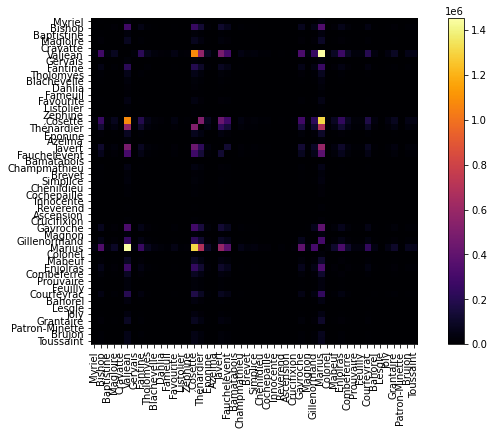

In [26]:
fig2 = plt.figure(figsize = (11,6))
ax2 = fig2.add_subplot(111)
plt.imshow(interactions_characters,cmap=plt.cm.inferno)
plt.colorbar()
plt.yticks(np.arange(0,numCharacters),character_list)
plt.xticks(np.arange(0,numCharacters),character_list)
ax2.tick_params(axis='x',rotation=90,labelsize=10)

taking logarithm of the interactions to improve the image

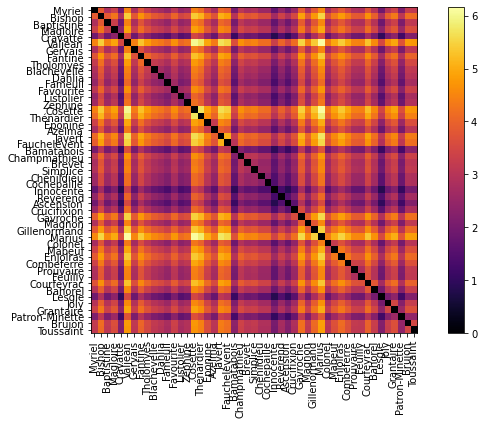

In [27]:
fig2 = plt.figure(figsize = (11,6))
ax3 = fig2.add_subplot(111)
plt.imshow(np.log10(1+interactions_characters),cmap=plt.cm.inferno)
plt.colorbar()
plt.yticks(np.arange(0,numCharacters),character_list)
plt.xticks(np.arange(0,numCharacters),character_list)
ax3.tick_params(axis='x',rotation=90,labelsize=10)

In [28]:
import networkx as nx
G1=nx.from_numpy_matrix(interactions_characters)

The network is drawn like this

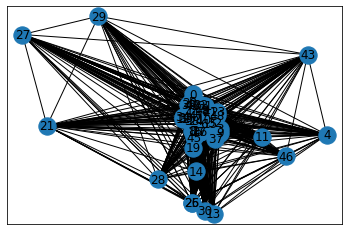

In [29]:
nx.draw_networkx(G1)

This is not very useful or attractive. First, we need to relabel the nodes:

In [30]:
character_map={}
for i in range(numCharacters):
    character_map[i]=character_list[i]

character_map

{0: 'Myriel',
 1: 'Bishop',
 2: 'Baptistine',
 3: 'Magloire',
 4: 'Cravatte',
 5: 'Valjean',
 6: 'Gervais',
 7: 'Fantine',
 8: 'Tholomyès',
 9: 'Blachevelle',
 10: 'Dahlia',
 11: 'Fameuil',
 12: 'Favourite',
 13: 'Listolier',
 14: 'Zéphine',
 15: 'Cosette',
 16: 'Thénardier',
 17: 'Éponine',
 18: 'Azelma',
 19: 'Javert',
 20: 'Fauchelevent',
 21: 'Bamatabois',
 22: 'Champmathieu',
 23: 'Brevet',
 24: 'Simplice',
 25: 'Chenildieu',
 26: 'Cochepaille',
 27: 'Innocente',
 28: 'Reverend',
 29: 'Ascension',
 30: 'Crucifixion',
 31: 'Gavroche',
 32: 'Magnon',
 33: 'Gillenormand',
 34: 'Marius',
 35: 'Colonel',
 36: 'Mabeuf',
 37: 'Enjolras',
 38: 'Combeferre',
 39: 'Prouvaire',
 40: 'Feuilly',
 41: 'Courfeyrac',
 42: 'Bahorel',
 43: 'Lesgle',
 44: 'Joly',
 45: 'Grantaire',
 46: 'Patron-Minette',
 47: 'Brujon',
 48: 'Toussaint'}

In [31]:
H1    = nx.relabel_nodes(G1, character_map)

And then we can display

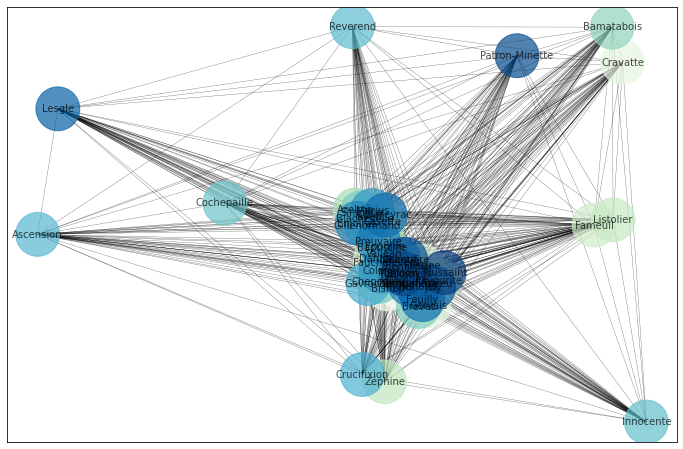

In [32]:
kdeg = G1.degree()
fig = plt.figure(figsize = (12,8))
ax1 = plt.subplot(111)
nx.draw_networkx(H1, node_color=range(numCharacters),font_color='black',width=0.3,alpha=0.7, 
                 font_size=10, cmap=plt.cm.GnBu
                 ,node_size =[40*val for (node,val) in kdeg])